In [1]:
import pandas as pd
import numpy as np
import geonamescache # countrycode information
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from matplotlib.colors import ListedColormap # color definition
sns.palplot(sns.color_palette("Set2", 6)) # color definition

In [2]:
path = "/...../starbucks/directory.csv"
df = pd.read_csv(path)

df["Timezone_region"] = df.Timezone.str.split(":00", expand=True)[1].str.split("/", expand=True)[0]
df["Country_name"] = df.Timezone.str.split(":00", expand=True)[1].str.split("/", expand=True)[1]

df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Timezone_region,Country_name
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,Europe,Andorra
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,Asia,Dubai
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,Asia,Dubai
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,Asia,Dubai
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,Asia,Dubai


In [3]:
pd.DataFrame(df.groupby("Country").size(), columns=["Number of Strores"]).head()

,Number of Strores
Country,
AD,1
AE,144
AR,108
AT,18
AU,22


In [4]:
gc = geonamescache.GeonamesCache()

#gc.get_cities()
ls_population = []
ls_continent_cc2 = [] 

for key, items in gc.get_continents().items():
    #print(key)
    if key != "AN":
        ls_population.append({"Continent": key, "Population": items["population"]})

df_Cpop = pd.DataFrame(ls_population, columns=["Continent","Population"])
print(df_Cpop)
for key, items in gc.get_continents().items():
    #print(key)
    if key != "AN":
        ls_continent_cc2.append({"Continent": key, "cc2": items["cc2"]})

# Dataframe for continent and cc2 information
df_CCC2 = pd.DataFrame(ls_continent_cc2, columns=["Continent","cc2"])

df_CCC2.set_index(keys="Continent", inplace=True)

df_CCC2 = df_CCC2.cc2.str.split(",", expand=True).reset_index(inplace=False).melt(id_vars = ['Continent'], value_name = "Country")
df_CCC2 = df_CCC2.loc[df_CCC2.Country.isna() != True]
df_CCC2.drop(columns="variable", inplace=True)
df_CCC2 = df_CCC2.sort_values(by=["Continent", "Country"]).reset_index(drop=True)
df_CCC2.head(10)

  Continent  Population
0        AF  1031833000
1        AS  3812366000
2        EU           0
3        NA           0
4        OC           0
5        SA   385742554


,Continent,Country
0,AF,AO
1,AF,BF
2,AF,BI
3,AF,BJ
4,AF,BW
5,AF,CD
6,AF,CF
7,AF,CG
8,AF,CI
9,AF,CM


In [5]:
df_CCC2.groupby("Continent").size()

Continent
AF    57
AS    50
EU    50
NA    41
OC    17
SA    14
dtype: int64

In [6]:
df_merge = df.merge(df_CCC2, left_on="Country", right_on="Country", how="left")
df_merge.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Timezone_region,Country_name,Continent
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,Europe,Andorra,EU
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,Asia,Dubai,AS
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,Asia,Dubai,AS
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,Asia,Dubai,AS
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,Asia,Dubai,AS


In [7]:
df_merge.loc[ (df_merge["Continent"].isna()== True)  ].groupby("Country").size()

Country
TW    394
dtype: int64

In [8]:
df_merge.loc[df_merge.Country == "TW", "Continent"] = "AS"

df_merge.loc[ (df_merge["Continent"].isna()== True)  ].groupby("Country").size()

Series([], dtype: int64)

In [9]:
print(pd.DataFrame(df_merge.groupby("Continent").size(), columns=["Number of store"]))
print("Total: {}".format(df_merge.groupby("Continent").size().sum()))

           Number of store
Continent                 
AF                      43
AS                    7496
EU                    1873
NA                   15732
OC                      46
SA                     410
Total: 25600


In [10]:
total = sum(df_merge.groupby("Continent").size())
df_continent_percentage = [i / total for i in df_merge.groupby("Continent").size() ]
for index, perct in enumerate(df_continent_percentage):
    print("For continent {}, percentage is %{:.3f}".format(list(df_merge.groupby("Continent").groups.keys())[index], perct *100))

For continent AF, percentage is %0.168
For continent AS, percentage is %29.281
For continent EU, percentage is %7.316
For continent NA, percentage is %61.453
For continent OC, percentage is %0.180
For continent SA, percentage is %1.602


In [11]:
width = 50 # width of chart
height = 20 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

tiles_per_continent = [round(perct * total_num_tiles) for perct in df_continent_percentage]
tiles_per_continent

for index, tile in enumerate(tiles_per_continent):
    print("For continent {}, tiles number is: {:.0f}".format(list(df_merge.groupby("Continent").groups.keys())[index], tile))

Total number of tiles is  1000
For continent AF, tiles number is: 2
For continent AS, tiles number is: 293
For continent EU, tiles number is: 73
For continent NA, tiles number is: 615
For continent OC, tiles number is: 2
For continent SA, tiles number is: 16


In [12]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_continent[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
    
print(waffle_chart)

[[1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 4.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 4.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 4.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 5.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 5.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
  4. 6.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.

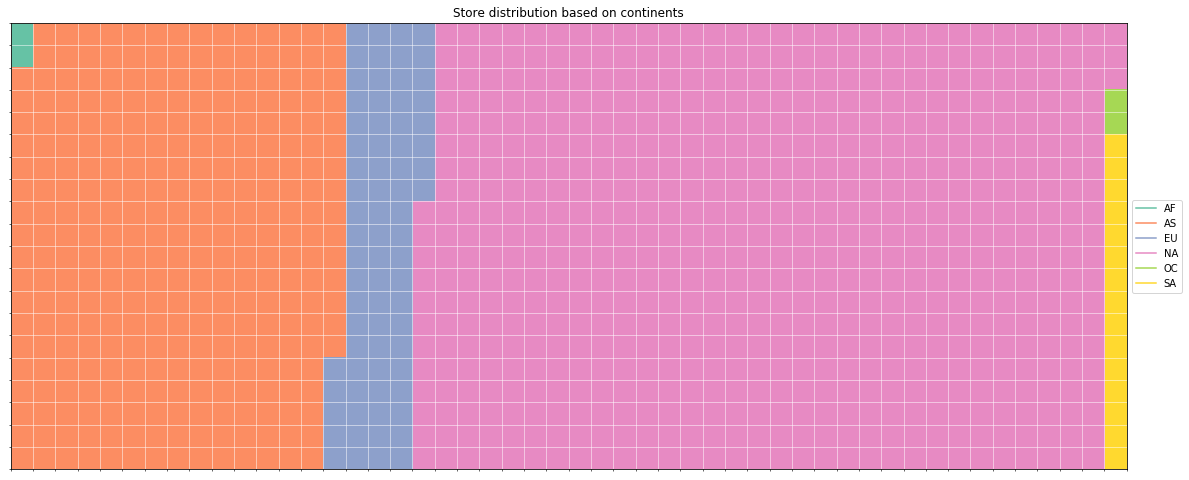

In [14]:
# instantiate a new figure object
fig, ax = plt.subplots(figsize=(20,10))

labels = list(df_merge.groupby("Continent").groups.keys())

# use matshow to display the waffle chart
color_map = sns.color_palette("Set2", 6)
#color_map = (sns.light_palette("green"))
color_map_as_hex = ListedColormap(color_map.as_hex())

for i,value in enumerate(labels):
    ax.plot(1,1, label=value, c=color_map[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.imshow(waffle_chart, cmap=color_map_as_hex)

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=.5)

plt.xticks([])
plt.yticks([])
plt.title("Store distribution based on continents")
plt.show();